# Data Exploration of Scene Data and Preliminary Data Analysis

In [236]:
import pandas as pd

import os

import pandas_profiling

import matplotlib.pyplot as plt

import numpy as np

import featuretools as ft

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read SP_Points

In [237]:
SP_Points = pd.read_csv("SceneAnalytics.dbo.SP_Points_cleaned.csv", encoding='latin-1', parse_dates=['pointdt'])

SP_Points['isBlackCard'] = SP_Points['pointtypeid'].apply(lambda x: True if x in [11,12,1252,1253,1254,1282,1283,1290,1322,1323] else False)

SP_PointsType =pd.read_csv("SceneAnalytics.dbo.SP_PointsType.csv", encoding='latin-1')
SP_LocationCARA =pd.read_csv("SceneAnalytics.dbo.SP_LocationCARA.csv", encoding='latin-1')
SP_Location =pd.read_csv("SceneAnalytics.dbo.SP_Location.csv", encoding='latin-1')
SP_Partner_E =pd.read_csv("SceneAnalytics.dbo.SP_Partner_E.csv", encoding='latin-1')

SP_Points = SP_Points.merge(SP_PointsType, left_on="ex_sourceid", right_on="pointtypeid", how="left", suffixes=('', 'SP_PointsType'))
SP_Points = SP_Points.merge(SP_LocationCARA, left_on="ex_sourceid", right_on="Locationcode", how="left", suffixes=('', 'SP_LocationCARA'))
SP_Points = SP_Points.merge(SP_Location, left_on="ex_sourceid", right_on="LocationCode", how="left", suffixes=('', 'SP_Location'))
SP_Points = SP_Points.merge(SP_Partner_E, left_on="ex_sourceid", right_on="PartnerID", how="left", suffixes=('', 'SP_Partner_E'))


#profile = pandas_profiling.ProfileReport(SP_Points, html={'style':{'full_width':True}}, minimal=True)
#profile.to_notebook_iframe()

In [238]:
SP_Points['Unique_member_identifier'].value_counts().head()

AE65CEA5-109E-4338-A34A-D6F30644B197    2003
05127285-1E07-4E06-949F-BBC99B87F0CC    1589
90324949-CBF1-4660-9232-BE65E7558358    1349
DB30CB7E-3910-482A-B6A7-7F63D58DC094    1338
41795499-6A03-47F2-9FD9-FE048F6ADFBC    1332
Name: Unique_member_identifier, dtype: int64

## Read SP_CustomerDetail

In [239]:
SP_CustomerDetail = pd.read_csv("SceneAnalytics.dbo.SP_CustomerDetail_cleaned.csv", encoding='latin-1')
SP_PointTypeStatistics = pd.read_csv("SceneAnalytics.dbo.SP_PointTypeStatistics.csv", encoding='latin-1', 
                                     parse_dates=['BlackEarnLastDt', 'BlackBurnLastDt', 'LoadTime', 'OrderLastDt', 'LastDt', 'ChildTicketLastDt',
                                                  'ConcessionLastDt', 'CnplxEarnTuesdayLastDt', 'MusicStoreLastDt', 'CnplxOnlineBonusLastDt'])
SP_FactEnrollment = pd.read_csv("SceneAnalytics.dbo.SP_FactEnrollment.csv", encoding='latin-1', parse_dates=['Birthdate', 'loadtime'])
SP_FactAttribute = pd.read_csv("SceneAnalytics.dbo.SP_FactAttribute.csv", encoding='latin-1')
SP_AccountBalance = pd.read_csv("SceneAnalytics.dbo.SP_AccountBalance.csv", encoding='latin-1')
SP_CustomerExtension = pd.read_csv("SceneAnalytics.dbo.SP_CustomerExtension.csv", encoding='latin-1', parse_dates=['CreateDt'])

In [240]:
SP_Customer = SP_CustomerDetail

SP_Customer = SP_Customer.merge(SP_PointTypeStatistics, how="left", suffixes=('', 'SP_PointTypeStatistics'))
SP_Customer = SP_Customer.merge(SP_FactEnrollment, how="left", suffixes=('', 'SP_FactEnrollment'))
SP_Customer = SP_Customer.merge(SP_FactAttribute, how="left", suffixes=('', 'SP_FactAttribute'))
SP_Customer = SP_Customer.merge(SP_AccountBalance, on="Unique_member_identifier", how="left", suffixes=('', 'SP_AccountBalance'))
SP_Customer = SP_Customer.merge(SP_CustomerExtension, how="left", suffixes=('', 'SP_CustomerExtension'))

In [241]:
#profile = pandas_profiling.ProfileReport(SP_Customer, html={'style':{'full_width':True}}, minimal=True)
#profile.to_notebook_iframe()

In [242]:
SP_CustomerDetail['Unique_member_identifier'].value_counts().head()

0C3C88DB-22E0-451D-B9C9-14DACFD7D324    1
D65A035F-42F2-44F6-A30C-081A85A1DDE3    1
B9886811-A6FC-481B-91C9-3667D4B1FD94    1
CCCAFBCA-E278-4164-B4D6-F7E8E11723AF    1
2B868E3A-69A1-4DEC-8FDF-9C8A1C838AFD    1
Name: Unique_member_identifier, dtype: int64

In [243]:
# https://stackoverflow.com/questions/27637281/what-are-python-pandas-equivalents-for-r-functions-like-str-summary-and-he
#https://gist.github.com/minhchan11/4e2f80383f4e93e764308776d116580a
def rstr(df): 
    structural_info = pd.DataFrame(index=df.columns)
    structural_info['unique_len'] = df.apply(lambda x: len(x.unique())).values
    structural_info['unique_val'] = df.apply(lambda x: [x.unique()]).values
    print(df.shape)
    return structural_info 

## Head & Shape
How do we filter the Points table for the transactions specifically related to their spend within theatres?

In [244]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [245]:
SP_Customer.head()

,Unique_member_identifier,City,StateProv,FSA,PointsTotal,LanguagePreference,gender,age_class,BlackEarnCount,BlackEarnLastDt,BlackEarnPointTotal,BlackBurnCount,BlackBurnLastDt,BlackBurnPointTotal,LoadTime,OrderCount,OrderPointTotal,OrderLastDt,ConcessionLastDt,MusicStoreLastDt,BlackActivityDays,CnplxOnlineBonusLastDt,CnplxEarnTuesdayLastDt,LastDt,ChildTicketLastDt,AccountOpenKey,AccountCloseKey,isAutoEnrolled,Birthdate,loadtime,EnrollmentSourceKey,isBNS,isVCL,isPrePaid,isActive,OnlineTicketPurchaser_tendancy,OnlineTicketPurchaser_value,TuesdayAttendee_tendancy,TuesdayAttendee_value,ConcessionPurchaser_tendancy,ConcessionPurchaser_value,OpensEmail_tendancy,OpensEmail_value,AttendsWithChild_tendancy,AttendsWithChild_value,ClicksEmail_tendancy,ClicksEmail_value,WeekendMatineeViewer_tendancy,WeekendMatineeViewer_value,WeekdayMatineeViewer_tendancy,WeekdayMatineeViewer_value,RedemptionYearToDate,RedemptionProgramToDate,Points,Adjustments,POSCineplex,POS,AccountOpenD2D,PacPadD2D,VISACineplex,VISA,VISAAccountOpen,CineplexIssue,CineplexRedeem,AdjustmentBNS,AdjustmentMaritz,AdjustmentCineplex,PointsScene,PointsCatalogOrders,CARAIssue,CARARedeem,AdjustmentCARA,BNSOther,AdjustmentBNSOther,VISAPrePaid,PointsTotalSP_AccountBalance,PrintCardFl,CreateDt,ReferredBy,ActivityStatusScotiaScene
0,3EC07935-F94A-4069-B03C-FCB7909D2226,Bradford,ON,L3Z,5284,English,Female,14-17,0,1900-01-01 00:00:00,0,0,1900-01-01 00:00:00,0,2017-07-23 10:20:10,0,0,1900-01-01,1900-01-01,1900-01-01,0,1900-01-01,1900-01-01,1900-01-01 00:00:00,1900-01-01,20170723,21000101,True,2002-03-23,2017-07-24 01:21:50,13,True,False,False,True,False,0,False,0,False,0,False,LOW,False,0,False,LOW,False,0,False,0,False,False,5284,0,145,139,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-07-23 05:45:40,NaN,0
1,E7ADE72A-7B37-4CE4-8C6B-CBD91C563E59,Priddis,AB,T0L,1617,English,Male,14-17,6,2017-11-17 19:58:47,2631,2,2017-11-17 19:23:13,-2000,2017-11-17 22:20:53,0,0,1900-01-01,2017-09-01,1900-01-01,0,1900-01-01,1900-01-01,2017-11-17 19:58:47,1900-01-01,20170715,21000101,True,2002-06-10,2017-07-16 03:50:56,13,True,False,False,True,False,0,False,0,True,100,False,LOW,False,0,False,LOW,False,0,False,0,True,True,1617,0,26,710,0,0,0,0,0,2400,-2000,0,0,0,481,0,0,0,0,0,0,0,0,1,2017-07-15 05:45:37,NaN,0
2,DC64E547-CC11-45A2-A1B7-2F47674DA8DB,Surrey,BC,V4N,1158,English,Female,35-44,87,2017-12-08 03:36:02,908,0,1900-01-01 00:00:00,0,2017-12-10 10:24:05,0,0,1900-01-01,1900-01-01,1900-01-01,0,1900-01-01,1900-01-01,2017-12-08 03:36:02,1900-01-01,20170715,21000101,False,1975-09-03,2017-07-15 13:55:00,4,False,False,False,True,False,0,False,0,False,0,True,LOW,False,0,False,LOW,False,0,False,0,False,False,966,192,0,0,0,0,0,0,0,0,0,0,192,0,966,0,0,0,0,0,0,0,0,1,2017-07-15 13:24:25,NaN,0
3,E186B0AF-3ACC-436E-A5B0-6B999EED8E19,Edmonton,AB,T6L,639,English,Female,18-24,6,2017-09-29 15:52:43,489,0,1900-01-01 00:00:00,0,2017-09-29 18:20:56,0,0,1900-01-01,2017-08-19,1900-01-01,0,1900-01-01,1900-01-01,2017-09-29 15:52:43,1900-01-01,20170715,21000101,False,1997-08-22,2017-07-15 19:55:00,26,False,False,False,True,False,0,False,0,False,40,True,MED,False,0,False,LOW,False,0,False,0,False,False,639,0,0,0,0,0,0,0,0,320,0,0,0,0,319,0,0,0,0,0,0,0,0,1,2017-07-15 19:37:01,NaN,0
4,610D46DC-934A-4BBA-8975-C67282AC6DE0,Vancouver,BC,V5N,0,English,Male,18-24,0,1900-01-01 00:00:00,0,0,1900-01-01 00:00:00,0,2017-07-16 10:20:02,0,0,1900-01-01,1900-01-01,1900-01-01,0,1900-01-01,1900-01-01,1900-01-01 00:00:00,1900-01-01,20170716,21000101,False,1999-03-13,2017-07-16 03:50:56,4,False,False,False,True,False,0,False,0,False,0,True,HIGH,False,0,False,LOW,False,0,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017-07-16 01:46:40,NaN,0


In [246]:
SP_Customer.shape

(18000, 80)

In [247]:
SP_Points.head()

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
0,FA36DEAA-FA5C-42E9-865F-F74097B98148,3025458815,2017-12-13 12:37:38,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
1,9DA8D29F-D126-4A0E-AA16-703291262D2C,3025371940,2017-12-12 11:05:52,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
2,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025338025,2017-12-12 09:58:15,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
3,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267021,2017-12-12 05:14:26,5,1322,7766.0,5.0,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
4,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267242,2017-12-12 05:11:05,5,1322,7766.0,5.0,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False


In [248]:
SP_Points.shape

(1196534, 27)

Purchases made on black card?

In [249]:
SP_Points[(SP_Points['isBlackCard']==True)].shape

(177544, 27)

## isBlackCard

In [250]:
SP_Points[(SP_Points['isBlackCard']==True)].head(15)

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
0,FA36DEAA-FA5C-42E9-865F-F74097B98148,3025458815,2017-12-13 12:37:38,4,1322,7766.0,4.00,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
1,9DA8D29F-D126-4A0E-AA16-703291262D2C,3025371940,2017-12-12 11:05:52,4,1322,7766.0,4.00,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
2,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025338025,2017-12-12 09:58:15,4,1322,7766.0,4.00,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
3,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267021,2017-12-12 05:14:26,5,1322,7766.0,5.00,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
4,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267242,2017-12-12 05:11:05,5,1322,7766.0,5.00,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
5,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267319,2017-12-12 05:03:55,15,1322,7766.0,15.00,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
6,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3023684918,2017-12-12 06:31:30,4,1322,7766.0,4.00,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
7,DCF885FE-2132-4FFD-9D7F-F563D81DE04C,3023658071,2017-12-13 22:48:05,-1500,12,7402.0,NaN,scene premium admit,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7402.0,Scotiabank Theatre Toronto,ON,Toronto,True,NaN,NaN,NaN,NaN
8,DCF885FE-2132-4FFD-9D7F-F563D81DE04C,3023658072,2017-12-13 22:48:05,-1500,12,7402.0,NaN,scene premium admit,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7402.0,Scotiabank Theatre Toronto,ON,Toronto,True,NaN,NaN,NaN,NaN
9,DCF885FE-2132-4FFD-9D7F-F563D81DE04C,3023658073,2017-12-13 22:48:05,150,11,7402.0,NaN,adult tickets premium,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7402.0,Scotiabank Theatre Toronto,ON,Toronto,True,NaN,NaN,NaN,NaN


In [251]:
SP_Points[(SP_Points['isBlackCard']==False)].head(15)

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
16,37C152E6-9EFE-492A-875D-E6521D3DCC41,3023345253,2017-12-13 09:04:02,1,1370,0.0,6.59,shoppers drug,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
17,E60C7987-5A0D-440F-AAA9-248B837A1172,3023409552,2017-12-13 09:09:39,1,1370,0.0,3.65,tim horton,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
18,CC572720-BC32-4C24-ADA8-B7B54221C07B,3023388380,2017-12-13 09:09:02,2,1370,0.0,11.83,habit coffee & culture,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
19,CC572720-BC32-4C24-ADA8-B7B54221C07B,3023388381,2017-12-13 09:09:02,12,1370,0.0,59.50,rise health,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
20,0DBA2CA4-8522-4783-A6FA-FEC6BDF6C297,3023389033,2017-12-13 09:09:02,1,1370,0.0,5.07,crusty pizza,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
21,0DBA2CA4-8522-4783-A6FA-FEC6BDF6C297,3023389034,2017-12-13 09:09:02,2,1370,0.0,10.20,woodville food market,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
22,BE547A87-0CD0-4B3B-98FD-2666ADCF1AE5,3023356554,2017-12-13 09:04:24,1,1370,0.0,2.69,7 eleven,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
23,91A6F770-91BF-43C9-8494-4CC4EF1E93AA,3023354357,2017-12-13 09:04:20,1,1370,0.0,5.07,smokers paradise,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
24,91A6F770-91BF-43C9-8494-4CC4EF1E93AA,3023354358,2017-12-13 09:04:20,1,1370,0.0,3.45,tim horton,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
25,CEAAED6E-5F63-40E0-A0FE-CBE9F6549C2E,3023343217,2017-12-13 09:03:56,1,1370,0.0,2.25,coke_,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN


How do we filter for in theatre purchases? From below we can see that this includes step_goals, cara points, etc. How do we limit this to spending? The hypothesis would be that we can use LocationNameSP_Location not null to do so.

### Transaction Descriptions for Black Card = True

In [252]:
transaction_counts_true = SP_Points[SP_Points['isBlackCard']==True].groupby(['ex_transactiondescription', 'isBlackCard'])[['Unique_member_identifier']].count().reset_index()
transaction_counts_true.sort_values(by=['Unique_member_identifier'], ascending=False).head(100)

,ex_transactiondescription,isBlackCard,Unique_member_identifier
671,step_goal_complete,True,42205
219,adult tickets,True,20837
326,intervention,True,17917
309,concessions,True,13254
231,cara points earned,True,13176
220,adult tickets premium,True,11266
342,online bonus en ligne,True,9642
234,child tickets,True,7185
622,scene admit,True,7135
304,concession combo,True,5884


### Transaction Descriptions for Black Card = False

In [253]:
transaction_counts_false = SP_Points[SP_Points['isBlackCard']==False].groupby(['ex_transactiondescription', 'isBlackCard'])[['Unique_member_identifier']].count().reset_index()
transaction_counts_false.sort_values(by=['Unique_member_identifier'], ascending=False).head(10)

,ex_transactiondescription,isBlackCard,Unique_member_identifier
66788,tim horton,False,92467
39346,mcdonalds,False,43802
71333,walmart,False,34590
57059,shoppers drug,False,19957
68994,uber,False,15742
60964,subway,False,15519
18484,dollarama,False,14894
47502,petro-canada,False,14605
21335,esso,False,12873
58072,sobeys,False,12611


Looks like the location hypothesis is true. Some of these have no transaction amounts.

### Transaction Descriptions when Location Name is Not Null
Location Name narrows this down to Cineplex locations

In [254]:
tcounts_loc = SP_Points[(SP_Points['isBlackCard']==True) & SP_Points['LocationNameSP_Location'].notnull()].groupby(['ex_transactiondescription', 'isBlackCard'])[['Unique_member_identifier']].count().reset_index()

In [255]:
tcounts_loc.sort_values(by=['Unique_member_identifier'], ascending=False).head(100)

,ex_transactiondescription,isBlackCard,Unique_member_identifier
2,adult tickets,True,20837
83,concessions,True,13251
3,adult tickets premium,True,11266
98,online bonus en ligne,True,9642
9,child tickets,True,7185
110,scene admit,True,7135
78,concession combo,True,5884
119,scene premium admit,True,2715
153,timeplay,True,2336
12,cineplex,True,1426


### Transaction Descriptions when Location Name is Null
Location Name blank are Black Card transactions associated with Carrot and Sport Chek partnerships at the time

In [256]:
tcounts_loc_null = SP_Points[(SP_Points['isBlackCard']==True) & SP_Points['LocationNameSP_Location'].isnull()].groupby(['ex_transactiondescription', 'isBlackCard', 'PartnerName'])[['Unique_member_identifier']].count().reset_index()

In [257]:
tcounts_loc_null.sort_values(by=['Unique_member_identifier'], ascending=False).head(100)

,ex_transactiondescription,isBlackCard,PartnerName,Unique_member_identifier
467,step_goal_complete,True,Carrot Rewards,42205
204,intervention,True,Carrot Rewards,17917
466,sign_up,True,Carrot Rewards,873
468,steps_enabled,True,Carrot Rewards,731
201,action_bonus,True,Carrot Rewards,664
205,intervention_bonus,True,Carrot Rewards,473
208,raf,True,Carrot Rewards,425
262,sc,True,Sport Chek,248
454,sc west mall,True,Sport Chek,149
206,metro,True,Sport Chek,146


### BlackCard = False, Cineplex Visa/Debit Transactions

In [258]:
SP_Points[(SP_Points['ex_transactiondescription']=='cineplex')].head(100)

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
791,4E20D387-EDE7-405F-A96C-D828ED86DD96,3017682790,2017-12-10 07:09:23,8,1296,0.0,7.51,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
792,4E20D387-EDE7-405F-A96C-D828ED86DD96,3017682791,2017-12-10 07:09:23,5,1296,0.0,5.40,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
924,D206A415-92C2-4C04-890F-D0BD5BD651A5,3022920638,2017-12-13 08:51:13,5,1296,0.0,1.04,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1073,AF0AB2FA-26DE-4B68-8553-551DDB415C3C,3017683262,2017-12-10 07:09:23,12,1296,0.0,12.25,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1357,8E84036A-F3F4-4877-A46D-E319CBE8D65F,3017683146,2017-12-10 07:09:23,17,1296,0.0,16.95,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1731,11C5E010-94FB-48AD-AE72-2832264AE1E5,3017682741,2017-12-10 07:09:23,22,1296,0.0,21.50,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1732,C8774E15-7C69-4C7A-A4E9-A23DFF94712D,3017676963,2017-12-10 07:09:02,30,1054,0.0,30.34,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
2440,803EE285-5443-4397-B818-C399F65515DA,3022920539,2017-12-13 08:51:13,12,1296,0.0,11.94,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
3562,CD4B45D9-F7CF-4C25-A48D-21245BDCDD9D,3021329292,2017-12-12 22:04:03,50,11,10008.0,NaN,cineplex,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10008.0,New Cineplex #10008,-,-,False,NaN,NaN,NaN,NaN
3568,18385505-C417-46A3-B54D-CDA9603467CF,3021989409,2017-12-13 08:08:41,140,1193,5143.0,27.98,cineplex,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5143.0,Park Lane,NS,Halifax,True,NaN,NaN,NaN,NaN


### Timeplay Transactions

In [259]:
SP_Points[(SP_Points['ex_transactiondescription']=='timeplay')].head()

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
512,54E34BBB-E96D-4BDE-A5C5-656B83D9ABF9,3021245280,2017-12-12 19:01:27,100,11,10001.0,NaN,timeplay,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,New Cineplex #10001,-,-,False,NaN,NaN,NaN,NaN
1367,69D3F841-8BBE-4142-8DD3-86B80FBB59B3,3021171489,2017-12-12 15:51:18,100,11,10001.0,NaN,timeplay,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,New Cineplex #10001,-,-,False,NaN,NaN,NaN,NaN
2408,4A46BA93-5513-4D86-AC9C-E0131DFEE1A5,3021283782,2017-12-12 20:24:11,100,11,10001.0,NaN,timeplay,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,New Cineplex #10001,-,-,False,NaN,NaN,NaN,NaN
2527,DCA3D3F5-A33D-4F0F-845B-2B05E388EB8A,3019939544,2017-12-11 23:32:13,100,11,10001.0,NaN,timeplay,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,New Cineplex #10001,-,-,False,NaN,NaN,NaN,NaN
3563,6FD2F839-CEB4-4141-B7E7-892C208BBF13,3021291879,2017-12-12 20:31:14,100,11,10001.0,NaN,timeplay,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,New Cineplex #10001,-,-,False,NaN,NaN,NaN,NaN


### Misc
#### Cara Points Earned

In [260]:
SP_Points[(SP_Points['ex_transactiondescription']=='cara points earned')].head(100)

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
12,BC07CAE0-FEFA-49EF-8915-8B6BDDF25213,3023516871,2017-12-13 16:04:23,3,1282,2525.0,11.95,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,CE3D8043-3461-4967-8A76-D8113CE62893,3023469739,2017-12-13 13:12:40,15,1282,8712.0,53.08,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,0F31F8F1-98E3-4147-99BB-DE5AA820648E,3021264724,2017-12-12 19:38:47,14,1282,1218.0,50.34,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,FB51A99A-2E35-4CB4-8821-9F6BBB2A221F,3021133650,2017-12-12 13:03:11,3,1282,2466.0,12.53,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,7CE95046-E585-457D-A045-B0D895897734,3019865429,2017-12-11 19:26:39,54,1282,3618.0,183.45,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,DCD97850-7149-4AEF-AD5F-BE8E35489C17,3019802376,2017-12-11 15:17:22,7,1282,1961.0,25.74,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,A21BAA27-B231-46A4-9E39-582CD3328BF4,3018333520,2017-12-10 13:18:09,6,1282,2275.0,23.59,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,A21BAA27-B231-46A4-9E39-582CD3328BF4,3018333532,2017-12-10 13:18:32,4,1282,2275.0,14.68,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,CB9A15A4-0722-43AF-9476-1C058C0FC49D,3018299465,2017-12-10 11:28:44,6,1282,2293.0,21.45,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,4CEDF17B-CE84-4E7D-B450-034631015EAE,3018433918,2017-12-10 16:41:46,8,1282,8668.0,29.36,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Unique Values Black Card False, transactions
How would we measure education and entertainment?
They measure - what the cluster enjoys doing, and where they hang out.
Can some of below be encoded as entertainment vs educational? i.e. LCBO
Can a unique customer be found in both non black card and blackcard? YES
Where do Scene points come from if not black card? Credit card
Restaurants - cheap, 
Add back cineplex
monthly spend?

In [261]:
SP_Points[(SP_Points['isBlackCard']==False)]['ex_transactiondescription'].value_counts().head(100)

tim horton                     92467
mcdonalds                      43802
walmart                        34590
shoppers drug                  19957
uber                           15742
subway                         15519
dollarama                      14894
petro-canada                   14605
esso                           12873
sobeys                         12611
starbucks                      11691
shell                          10929
canadian tire                  10085
7 eleven                        9946
macs conv                       9218
no frills                       8369
costco                          7616
lcbo                            7581
metro                           7338
a & w                           7288
ultramar                        6482
safeway                         6445
real canadian superstore        6001
amazon                          5717
wendys                          5413
itunes                          4825
bell                            4824
p

#### Unique Values Partner Name

In [262]:
SP_Points['PartnerName'].value_counts()

Carrot Rewards        63288
Sport Chek             9590
Telus                     3
Live Entertainment        1
ScotiaRewards             1
Name: PartnerName, dtype: int64

In [263]:
SP_Points[(SP_Points['PartnerName']=='Carrot Rewards')].head(100)

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
0,FA36DEAA-FA5C-42E9-865F-F74097B98148,3025458815,2017-12-13 12:37:38,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
1,9DA8D29F-D126-4A0E-AA16-703291262D2C,3025371940,2017-12-12 11:05:52,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
2,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025338025,2017-12-12 09:58:15,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
3,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267021,2017-12-12 05:14:26,5,1322,7766.0,5.0,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
4,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267242,2017-12-12 05:11:05,5,1322,7766.0,5.0,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
5,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3025267319,2017-12-12 05:03:55,15,1322,7766.0,15.0,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
6,F8389974-18D2-4915-AFFB-E6D2C0A10B2D,3023684918,2017-12-12 06:31:30,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
11,44F8D157-0D6F-4A25-BF9B-231274F1F5FE,3023559055,2017-12-11 11:15:16,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
14,884FF974-035B-4EED-8246-8CBF8B017C2D,3023474584,2017-12-11 06:03:01,4,1322,7766.0,4.0,step_goal_complete,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False
85,9DA8D29F-D126-4A0E-AA16-703291262D2C,3021351699,2017-12-11 03:59:35,15,1322,7766.0,15.0,intervention,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7766.0,7766.0,Carrot Rewards,False


In [264]:
SP_Points[(SP_Points['PartnerName']=='Sport Chek')].head()

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
19822,60CB1340-431B-4326-9319-B3915C18FCA9,2838657892,2017-08-31 12:41:43,9,1322,7769.0,9.99,sc bayers lake,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7769.0,7769.0,Sport Chek,False
19823,B99A89D3-1169-4B75-80E4-5327E5073927,2838675914,2017-08-31 13:29:34,74,1322,7769.0,74.99,sc argyle mall,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7769.0,7769.0,Sport Chek,False
20156,27C8BD2A-3A7F-4A37-ADE5-16EA7E1208CF,2838790389,2017-08-31 20:56:58,-16000,1323,7769.0,-160.00,sc 8k alliston,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7769.0,7769.0,Sport Chek,False
20157,27C8BD2A-3A7F-4A37-ADE5-16EA7E1208CF,2838790432,2017-08-31 20:57:39,2,1322,7769.0,2.96,sc 8k alliston,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7769.0,7769.0,Sport Chek,False
20164,F8AAE5EC-CF3A-49BB-94B4-067C32763A22,2838726505,2017-08-31 17:25:37,31,1322,7769.0,31.99,sc sherway gardens,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7769.0,7769.0,Sport Chek,False


Unique member is tied to both black card purchases and not

### Do members have both VISA/Debit and Scene cards? Yes

In [265]:
SP_Points.pivot_table(index='Unique_member_identifier', 
               columns='isBlackCard',
               aggfunc='size',
               fill_value=0).head(100)

isBlackCard,False,True
Unique_member_identifier,,
0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,0,12
0011F14C-9243-413A-B3AD-3DCD494D6F39,205,7
0014268B-0B42-44F8-AD01-99D12755E997,0,2
00172DDC-AF4A-4B1E-8CFA-4FB5B9076A53,641,0
001D64FC-065E-432B-9F8A-4C0075554525,201,9
00209D6D-B46F-40FE-8998-7FBBF558E514,163,0
003BE3B6-BA4A-4BB0-A10B-4FC5AF09C9E1,0,17
003D9590-2B49-4CD9-8814-32CF143E4AB7,272,0
00405A34-D94E-4A30-A934-304A4A979DA1,2,0


In [266]:
SP_Points[(SP_Points['isBlackCard']==False) & SP_Points['LocationNameSP_Location'].notnull()].tail(50)

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
1196452,FE6597E3-E6E7-4DDD-BBE2-3348BB6BAD98,2853463824,2017-09-09 06:55:11,2,1198,0.0,2.09,mcdonalds,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196453,FE6597E3-E6E7-4DDD-BBE2-3348BB6BAD98,2853463825,2017-09-09 06:55:11,11,1198,0.0,10.97,second cup,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196454,FE6597E3-E6E7-4DDD-BBE2-3348BB6BAD98,2853463826,2017-09-09 06:55:11,89,1198,0.0,89.27,uoit general,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196455,FAB4170A-7466-43F6-872F-897C7FF6F49C,2853594971,2017-09-09 06:56:50,1,1362,0.0,6.20,dairy queen,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196456,FAB4170A-7466-43F6-872F-897C7FF6F49C,2853594972,2017-09-09 06:56:50,6,1362,0.0,32.45,lcbo,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196457,1E90A7E0-FA69-4C10-8CED-77D4C2145AEA,2853596245,2017-09-09 06:56:51,1,1362,0.0,6.63,tim horton,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196458,836A4A0C-9CC1-4E32-BC73-9AE4387FAC56,2853560713,2017-09-09 06:56:27,-500,1199,0.0,500.00,old mill cadillac chev gm,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196459,AE47FFEA-5FFF-485A-AFFA-5D4C16DB3FAC,2853543544,2017-09-09 06:56:18,22,1198,0.0,21.88,amazon,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196460,BB07DC3A-25EE-41A1-BD05-7E7BE0B7CDC6,2853537795,2017-09-09 06:56:14,143,1198,0.0,143.03,raceit-rnrlv17,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN
1196461,2203A420-56D2-4606-B942-D76FB6524CFD,2853639417,2017-09-09 06:57:45,3,1363,0.0,15.75,petro canada mobility,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Unknown Cineplex Location,-,Toronto,False,NaN,NaN,NaN,NaN


### Does BlackCard have transaction values? Pretty much no
Will the TransAmounts have actual values?
https://stackoverflow.com/questions/47170311/pandas-groupby-count-non-null-values-as-percentage

In [267]:
BlackCard_Cineplex = SP_Points[(SP_Points['isBlackCard']==True) & SP_Points['LocationNameSP_Location'].notnull()]

In [268]:
BlackCard_Cineplex.set_index("ex_transactiondescription").notnull().groupby(level=0).mean()

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
ex_transactiondescription,,,,,,,,,,,,,,,,,,,,,,,,,,
4dx tues ticket 100pts - cm002613 - earning,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4dx tues ticket 50pts - cm002612 - earnings,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
adult tickets,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.074867,0.074867,0.074867,0.074867,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
adult tickets premium,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.064442,0.064442,0.064442,0.064442,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
adult tickets vip,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.098818,0.098818,0.098818,0.098818,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
blue monday 750 points dbox,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
cara points earned,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.611940,0.611940,0.611940,0.611940,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
cara points earned - correction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
cara points redeemed,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [269]:
BlackCard_Cineplex[BlackCard_Cineplex['ex_transactiondescription']=='cara points earned']

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted
21744,5F83E711-0223-44C6-864A-BCB0412C87B0,2840575526,2017-09-01 20:12:19,10,1282,1146.0,37.26,cara points earned,True,1146.0,POSCIN07404,POS IN COLISEUM #7404,POS IN COLISEUM #7404,NaN,NaN,NaN,NaN,NaN,1146.0,Westshore Langford,BC,Langford,False,NaN,NaN,NaN,NaN
25023,5E8AAE35-026C-4E32-9DE8-67E36044CB32,2845504773,2017-09-04 22:14:24,9,1282,1147.0,30.60,cara points earned,True,1147.0,POSCIN07405,POS IN SILVER CITY #7405,POS IN SILVER CITY #7405,NaN,NaN,NaN,NaN,NaN,1147.0,International Village,BC,Vancouver,True,NaN,NaN,NaN,NaN
25025,5E8AAE35-026C-4E32-9DE8-67E36044CB32,2845431493,2017-09-04 18:42:42,9,1282,1147.0,30.60,cara points earned,True,1147.0,POSCIN07405,POS IN SILVER CITY #7405,POS IN SILVER CITY #7405,NaN,NaN,NaN,NaN,NaN,1147.0,International Village,BC,Vancouver,True,NaN,NaN,NaN,NaN
25467,46C93BE5-01DA-4ACA-A3BA-FE894AB2D5F9,2840468675,2017-09-01 14:20:37,8,1282,7122.0,30.49,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7122.0,CI - AMC Courtney Park 16,ON,Mississauga,True,NaN,NaN,NaN,NaN
28605,AE3D8F9F-E602-4D77-8977-DE388C32128F,2838698670,2017-08-31 15:23:52,10,1282,1146.0,34.44,cara points earned,True,1146.0,POSCIN07404,POS IN COLISEUM #7404,POS IN COLISEUM #7404,NaN,NaN,NaN,NaN,NaN,1146.0,Westshore Langford,BC,Langford,False,NaN,NaN,NaN,NaN
38752,51E4C312-6ADC-43C4-87E2-838D1B451E23,2842513258,2017-09-02 20:11:42,5,1282,1147.0,17.15,cara points earned,True,1147.0,POSCIN07405,POS IN SILVER CITY #7405,POS IN SILVER CITY #7405,NaN,NaN,NaN,NaN,NaN,1147.0,International Village,BC,Vancouver,True,NaN,NaN,NaN,NaN
39708,ED2605D2-E76C-447E-A75A-3B76ADB2C998,2845411158,2017-09-04 17:49:45,10,1282,1103.0,37.02,cara points earned,True,1103.0,POSCIN04403,POS IN CINEPLEX #4403,POS IN CINEPLEX #4403,NaN,NaN,NaN,NaN,NaN,1103.0,Cineplex Odeon Park & Tilford,BC,Vancouver,True,NaN,NaN,NaN,NaN
56055,1F27271F-0C7C-468A-8235-FDAE792FDA46,2832299889,2017-08-27 19:11:03,19,1282,3634.0,67.23,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3634.0,Eau Claire Cinescape,AB,Prairies,False,NaN,NaN,NaN,NaN
56066,46A0DDE8-F632-438D-AF86-C043FB09C419,2832207098,2017-08-27 13:32:43,4,1282,1146.0,15.24,cara points earned,True,1146.0,POSCIN07404,POS IN COLISEUM #7404,POS IN COLISEUM #7404,NaN,NaN,NaN,NaN,NaN,1146.0,Westshore Langford,BC,Langford,False,NaN,NaN,NaN,NaN
65288,E8C09388-C6B8-45BA-8176-6723F94F7ED8,2999501239,2017-11-30 17:57:50,8,1282,3634.0,27.99,cara points earned,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3634.0,Eau Claire Cinescape,AB,Prairies,False,NaN,NaN,NaN,NaN


# Data Preparation

## Creating a new dataframe for movie transactions only

Need a dataframe that has Customer, Date (no time), Net Points, Actual Spend, Converted Spend, Category [Black Card Only, Visa/Debit Only, Black Card + Visa/Debit)

First, start by creating 2 dataframes (1 for BC, 1 for non-BC)

In [270]:
from datetime import datetime

In [271]:
#https://stackoverflow.com/questions/26387986/strip-time-from-an-object-date-in-pandas
SP_Points['pointdt_new'] = SP_Points['pointdt'].apply(lambda x:x.date().strftime('%Y-%m-%d'))

### Split SP_Points into Black Card Movie / Non Black Card Movie Transactions

In [272]:
bc_movie = SP_Points[(SP_Points['isBlackCard']==True) & (SP_Points['LocationNameSP_Location'].notnull())]
non_bc_movie = SP_Points[(SP_Points['isBlackCard']==False) & (SP_Points['ex_transactiondescription']=='cineplex')]

#### Aggregate the Transactions into Daily Totals

In [273]:
bc_movie_day = bc_movie[['Unique_member_identifier', 'pointdt_new', 'points', 'TransAmount', 'isBlackCard']]

In [274]:
bc_movie_day = bc_movie_day.groupby(['Unique_member_identifier', 'pointdt_new', 'isBlackCard']).sum().reset_index()

In [275]:
non_bc_movie_day = non_bc_movie[['Unique_member_identifier', 'pointdt_new', 'points', 'TransAmount','isBlackCard']]

In [276]:
non_bc_movie_day = non_bc_movie_day.groupby(['Unique_member_identifier', 'pointdt_new', 'isBlackCard']).sum().reset_index()

In [277]:
print(bc_movie_day.shape)
print(non_bc_movie_day.shape)

(42632, 5)
(2854, 5)


In [278]:
bc_movie_day.head()

,Unique_member_identifier,pointdt_new,isBlackCard,points,TransAmount
0,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-15,True,100,0.0
1,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-16,True,50,0.0
2,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-22,True,100,0.0
3,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-02-28,True,100,0.0
4,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-03-03,True,120,0.0


What are the 100/50 point earn days? These are mostly bonuses for buying tickets.

### Pulling up the transactions for 1 member

In [279]:
SP_Points[(SP_Points['Unique_member_identifier']=='001D64FC-065E-432B-9F8A-4C0075554525') & (SP_Points['isBlackCard']==True)]

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted,pointdt_new
118219,001D64FC-065E-432B-9F8A-4C0075554525,2807935283,2017-08-12 22:26:38,100,11,1408.0,NaN,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,SilverCity Metropolis,BC,Burnaby,True,NaN,NaN,NaN,NaN,2017-08-12
249863,001D64FC-065E-432B-9F8A-4C0075554525,2749817857,2017-07-09 13:21:57,100,11,1408.0,NaN,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,SilverCity Metropolis,BC,Burnaby,True,NaN,NaN,NaN,NaN,2017-07-09
304133,001D64FC-065E-432B-9F8A-4C0075554525,2738074757,2017-07-01 16:48:24,100,11,1408.0,NaN,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,SilverCity Metropolis,BC,Burnaby,True,NaN,NaN,NaN,NaN,2017-07-01
323355,001D64FC-065E-432B-9F8A-4C0075554525,2727783494,2017-06-25 17:25:33,-1500,12,1408.0,NaN,scene premium admit,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,SilverCity Metropolis,BC,Burnaby,True,NaN,NaN,NaN,NaN,2017-06-25
390203,001D64FC-065E-432B-9F8A-4C0075554525,2688849366,2017-06-02 14:51:21,250,1254,2236.0,NaN,promotion welcome bonus points/points en bienv...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-02
406886,001D64FC-065E-432B-9F8A-4C0075554525,2682249209,2017-05-29 16:14:12,145,1322,7769.0,145.34,sc lougheed mall,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7769.0,7769.0,Sport Chek,False,2017-05-29
808758,001D64FC-065E-432B-9F8A-4C0075554525,2966916292,2017-11-12 18:47:52,-1000,12,1408.0,NaN,scene admit,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,SilverCity Metropolis,BC,Burnaby,True,NaN,NaN,NaN,NaN,2017-11-12
808759,001D64FC-065E-432B-9F8A-4C0075554525,2966916294,2017-11-12 18:47:52,-1000,12,1408.0,NaN,scene admit,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,SilverCity Metropolis,BC,Burnaby,True,NaN,NaN,NaN,NaN,2017-11-12
808760,001D64FC-065E-432B-9F8A-4C0075554525,2966916791,2017-11-12 18:49:31,100,11,1408.0,NaN,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,SilverCity Metropolis,BC,Burnaby,True,NaN,NaN,NaN,NaN,2017-11-12


### Do members ever use both black scene card and visa/debit on the same day? Rarely

In [280]:
merged_df = bc_movie_day.merge(non_bc_movie_day, how='left', on=['Unique_member_identifier','pointdt_new'], suffixes=['BC','NonBC'])

In [281]:
merged_df.shape

(42632, 8)

In [282]:
merged_df[merged_df.pointsNonBC.notnull()].shape

(66, 8)

In [283]:
(66*100)/42632

0.1548132857947082

No real need to merge it. Only 0.15% of instances they used both on the same day.


### Create a list of transactions, so that I can assign dollar values to these 

In [284]:
transaction_pt_avgs = SP_Points[(SP_Points['isBlackCard']==True) & SP_Points['LocationNameSP_Location'].notnull()].groupby(['ex_transactiondescription', 'isBlackCard'])[['points']].agg(['mean', 'count']).reset_index()

In [285]:
transaction_pt_avgs.head()

ex_transactiondescription isBlackCard      points       
                                                                  mean  count
0  4dx tues ticket 100pts - cm002613 - earning        True  100.000000      1
1  4dx tues ticket 50pts - cm002612 - earnings        True   50.000000      3
2                                adult tickets        True   96.275855  20837
3                        adult tickets premium        True  143.529203  11266
4                            adult tickets vip        True  185.810811   1184

In [286]:
#https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index
##https://stackoverflow.com/questions/38727863/how-to-access-multiindex-column-after-groupby-in-pandas
transaction_pt_avgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (ex_transactiondescription, )  162 non-null    object 
 1   (isBlackCard, )                162 non-null    bool   
 2   (points, mean)                 162 non-null    float64
 3   (points, count)                162 non-null    int64  
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [287]:
transaction_pt_avgs.sort_values(by=[('points','count')], ascending=False).head(100)

ex_transactiondescription isBlackCard  \
                                                                     
2                                        adult tickets        True   
83                                         concessions        True   
3                                adult tickets premium        True   
98                               online bonus en ligne        True   
9                                        child tickets        True   
110                                        scene admit        True   
78                                    concession combo        True   
119                                scene premium admit        True   
153                                           timeplay        True   
12                                            cineplex        True   
4                                    adult tickets vip        True   
104                        outtakes combos 1000 points        True   
115                                        scene combo        True   
111                                   scene admit nonr        True   
116                                   scene dbox admit        True   
161                                       xscape items        True   
120                                  scene promo admit        True   
109                                           rec room        True   
101                           outtakes combo 75 points        True   
6                                   cara points earned        True   
88                                                 frc        True   
131                                    scene vip admit        True   
100                       opera ticket-billets d opera        True   
90                   front row centre discount tickets        True   
112                              scene adult night out        True   
93   interactive - holiday gift pack 2017 - promos ...        True   
122                          scene promo admit premium        True   
94   interactive - movie gift pack 2017 - promos po...        True   
105                                        pizza pizza        True   
87                                       event premium        True   
89                       frc - flashback film festival        True   
46       cm002590-transformers last knight 200pts 8.1.        True   
10              cinema city adult ticket-adulte billet        True   
106                                     playdium items        True   
51                      cm002603-dunkirk 200pts - 8.9.        True   
73               cm002693-daddys home 2 200pts - 12.5.        True   
21        cm002516 - office x-mas party 200pts - 1/12/        True   
71           cm002682-bad moms xmas 300pts en - 11.27.        True   
97                                                misc        True   
114                              scene child night out        True   
137                                sno premium package        True   
141                          summer movie escape packs        True   
47              cm002592-baby driver 200pts en - 7/14/        True   
125                              scene promo admit vip        True   
96                  media survey - 100 points - 06/11/        True   
133                                              shell        True   
49              cm002598-de pere en flic 2 200pts 8.2.        True   
24             cm002528 - la la land 300pts en - 2/16/        True   
121                             scene promo admit nonr        True   
50          cm002601-valerian&amp;tcoatp 300pts - 8.8.        True   
11              cinema city child ticket-enfant billet        True   
66          cm002669-my little pony 300pts en - 10.31.        True   
117                                  scene frc general        True   
99          opera ticket child - enfant billets dopera        True   
118                                  scene frc premium        True   
56         cm002634-birth of the dragon

In [288]:
# output to excel for further spreadsheet analysis
#transaction_pt_avgs.sort_values(by=[('points','count')], ascending=False).to_excel("point_earnings.xlsx")

## Points To Dollars Conversion

In [289]:
bc_movie[['TransAmount']] = bc_movie[['TransAmount']].fillna(value=0)

In [290]:
bc_movie['PointsConverted'] = bc_movie['points']/5

In [291]:
bc_movie['pointdt_new'] = pd.to_datetime(bc_movie['pointdt_new'])

In [292]:
non_bc_movie_day['pointdt_new'] = pd.to_datetime(non_bc_movie_day['pointdt_new'])

In [293]:
def convert_points(row):
    if row['points']<0:
        amount =  0
    elif row['points']>=100:
        if datetime.weekday(row['pointdt_new'])==1: amount = 7.99
        else: amount = 12.99
    elif row['points']>=200:
        if datetime.weekday(row['pointdt_new'])==1: amount = 15.99
        else: amount = 24.50      
    elif row['ex_transactiondescription']=="adult tickets": 
        if datetime.weekday(row['pointdt_new'])==1: amount = 12.99     
        else: amount = 7.99
    elif row['ex_transactiondescription']=="adult tickets premium": 
        if datetime.weekday(row['pointdt_new'])==1: amount = 24.50   
        else: amount = 15.99
    elif row['ex_transactiondescription']=="child tickets":
        if datetime.weekday(row['pointdt_new'])==1: amount = 8.99
        else: amount = 7.99 
    elif row['ex_transactiondescription']=="adult tickets vip": 
        if datetime.weekday(row['pointdt_new'])==1: amount = 19.99
        else: amount = 14.99   
    elif row['ex_transactiondescription']=="timeplay": amount = 0
    elif row['ex_transactiondescription']=="online bonus en ligne": amount = 0
    elif row['ex_transactiondescription']=="xscape items": amount = row['points']/10
    elif row['ex_transactiondescription']=="rec room": amount = row['points']/10
    else:
        amount = row['PointsConverted']
    return amount

In [294]:
bc_movie['PointsConverted'] = bc_movie.apply(convert_points, axis=1)

In [295]:
bc_movie.head(20)

,Unique_member_identifier,pointid,pointdt,points,pointtypeid,ex_sourceid,TransAmount,ex_transactiondescription,isBlackCard,pointtypeidSP_PointsType,Code,name,descr,Locationcode,ex_sourceID,LocationName,Province,isActive,LocationCode,LocationNameSP_Location,ProvinceSP_Location,City,isActiveSP_Location,Ex_sourceid,PartnerID,PartnerName,isDeleted,pointdt_new,PointsConverted
7,DCF885FE-2132-4FFD-9D7F-F563D81DE04C,3023658071,2017-12-13 22:48:05,-1500,12,7402.0,0.0,scene premium admit,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7402.0,Scotiabank Theatre Toronto,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-13,0.00
8,DCF885FE-2132-4FFD-9D7F-F563D81DE04C,3023658072,2017-12-13 22:48:05,-1500,12,7402.0,0.0,scene premium admit,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7402.0,Scotiabank Theatre Toronto,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-13,0.00
9,DCF885FE-2132-4FFD-9D7F-F563D81DE04C,3023658073,2017-12-13 22:48:05,150,11,7402.0,0.0,adult tickets premium,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7402.0,Scotiabank Theatre Toronto,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-13,12.99
10,DCF885FE-2132-4FFD-9D7F-F563D81DE04C,3023658075,2017-12-13 22:48:05,20,11,7402.0,0.0,online bonus en ligne,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7402.0,Scotiabank Theatre Toronto,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-13,0.00
13,76E3B949-1B94-4885-B03E-9A9375EF5E3F,3023517979,2017-12-13 17:06:00,100,11,6107.0,0.0,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6107.0,Saint John,NB,St. John,True,NaN,NaN,NaN,NaN,2017-12-13,12.99
87,A3D9D3CB-14C1-4B9E-AABA-BE245F561CC5,3021248209,2017-12-12 19:09:54,100,11,7406.0,0.0,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7406.0,SilverCity Yorkdale,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-12,7.99
88,A3D9D3CB-14C1-4B9E-AABA-BE245F561CC5,3021249916,2017-12-12 19:10:07,100,11,7406.0,0.0,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7406.0,SilverCity Yorkdale,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-12,7.99
89,A3D9D3CB-14C1-4B9E-AABA-BE245F561CC5,3021250729,2017-12-12 19:13:03,-500,12,7406.0,0.0,concessions,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7406.0,SilverCity Yorkdale,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-12,0.00
90,A3D9D3CB-14C1-4B9E-AABA-BE245F561CC5,3021250730,2017-12-12 19:13:03,72,11,7406.0,0.0,concessions,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7406.0,SilverCity Yorkdale,ON,Toronto,True,NaN,NaN,NaN,NaN,2017-12-12,14.40
91,0BE707FD-95B8-48FA-94B0-0B1F822EEC96,3021212331,2017-12-12 18:04:29,100,11,9172.0,0.0,adult tickets,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9172.0,Cineplex Odeon Quartier Latin,QC,Montreal,True,NaN,NaN,NaN,NaN,2017-12-12,7.99


In [296]:
bc_movie['TransAmount'] = bc_movie['TransAmount']+bc_movie['PointsConverted']

In [297]:
bc_movie_day = bc_movie[['Unique_member_identifier', 'pointdt_new', 'points', 'TransAmount', 'isBlackCard']]

In [298]:
bc_movie_day = bc_movie_day.groupby(['Unique_member_identifier', 'pointdt_new', 'isBlackCard']).sum().reset_index()

In [299]:
bc_movie_day.head(20)

,Unique_member_identifier,pointdt_new,isBlackCard,points,TransAmount
0,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-15,True,100,12.99
1,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-16,True,50,10.00
2,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-22,True,100,12.99
3,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-02-28,True,100,7.99
4,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-03-03,True,120,12.99
5,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-03-21,True,170,7.99
6,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-04-12,True,170,12.99
7,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-04-14,True,170,12.99
8,001D64FC-065E-432B-9F8A-4C0075554525,2017-06-25,True,-1500,0.00
9,001D64FC-065E-432B-9F8A-4C0075554525,2017-07-01,True,100,12.99


In [300]:
combined_movies = pd.concat([bc_movie_day,non_bc_movie_day])

In [301]:
combined_movies.shape

(45486, 5)

(0.0, 100.0)

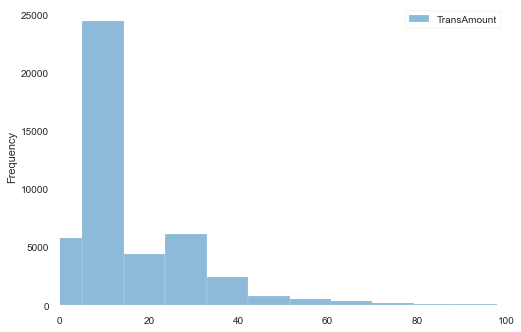

In [302]:
ax2 = combined_movies[['TransAmount']].plot.hist(alpha=0.5, bins=50)
ax2.set_xlim(0,100)

In [303]:
combined_movies['SpendOver30'] = combined_movies['TransAmount'].apply(lambda x: 1 if x > 30 else 0)

### Calculating the Number of Months Between Users First and Last Transaction (No Longer Used)
https://stackoverflow.com/questions/25024797/max-and-min-date-in-pandas-groupby

In [304]:
minmaxdates = combined_movies.groupby(['Unique_member_identifier']).agg({'pointdt_new': [np.min,np.max]})

In [305]:
minmaxdates.columns

MultiIndex([('pointdt_new', 'amin'),
            ('pointdt_new', 'amax')],
           )

In [306]:
minmaxdates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9217 entries, 0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6 to FFFF0980-318B-436C-90B5-CDD53D521373
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   (pointdt_new, amin)  9217 non-null   datetime64[ns]
 1   (pointdt_new, amax)  9217 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 216.0+ KB


Rename columns to be a bit more clean
https://stackoverflow.com/questions/41221079/rename-multiindex-columns-in-pandas

In [307]:
minmaxdates.columns.set_levels(['earliestdate','latestdate'],level=1,inplace=True)

In [308]:
minmaxdates.head()

pointdt_new           
                                     earliestdate latestdate
Unique_member_identifier                                    
0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6   2017-01-15 2017-04-14
001D64FC-065E-432B-9F8A-4C0075554525   2017-06-25 2017-11-12
003BE3B6-BA4A-4BB0-A10B-4FC5AF09C9E1   2016-12-26 2017-09-30
004F9561-7BF9-4058-B088-66AC1E954950   2016-12-25 2017-11-29
00596B7E-CB7D-4FB6-8A00-4CF5CCBA821D   2017-02-20 2017-02-20

In [309]:
minmaxdates[('pointdt_new','latestdate')] = pd.to_datetime(minmaxdates[('pointdt_new','latestdate')])

In [310]:
minmaxdates[('pointdt_new','earliestdate')] = pd.to_datetime(minmaxdates[('pointdt_new','earliestdate')])

In [311]:
# https://stackoverflow.com/questions/42822768/pandas-number-of-months-between-two-dates
minmaxdates[('','user_months')] = ((minmaxdates[('pointdt_new','latestdate')] - minmaxdates[('pointdt_new','earliestdate')])/np.timedelta64(1, 'M'))
#minmaxdates[('','user_months')]  = minmaxdates[('','user_months')] .astype(int)


In [312]:
import math
minmaxdates[('','user_months')] = minmaxdates[('','user_months')].apply(math.ceil)
# For people who only had 1 transaction
minmaxdates[('','user_months')] = minmaxdates[('','user_months')].apply(lambda x: 1 if x == 0 else x)

In [313]:
minmaxdates.columns = minmaxdates.columns.droplevel(0)

In [314]:
minmaxdates = minmaxdates.reset_index()

In [315]:
# Get User Total Spend and average spend using feature tools
combined_movies.head()

,Unique_member_identifier,pointdt_new,isBlackCard,points,TransAmount,SpendOver30
0,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-15,True,100,12.99,0
1,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-16,True,50,10.00,0
2,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-22,True,100,12.99,0
3,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-02-28,True,100,7.99,0
4,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-03-03,True,120,12.99,0


https://www.youtube.com/watch?v=Q5U9rEKHIsk https://docs.featuretools.com/en/stable/loading_data/using_entitysets.html https://docs.featuretools.com/en/stable/generated/featuretools.dfs.html#featuretools.dfs import featuretools as ft

### Revised # of Months

In the review of the clusters, we determined that we actually need the calculate the total number of months since they got the card.

In [316]:
SP_Customer_Dates = SP_Customer[['Unique_member_identifier','AccountOpenKey','AccountCloseKey']]
SP_Customer_Dates['AccountOpenKey'] = pd.to_datetime(SP_Customer_Dates['AccountOpenKey'], format='%Y%m%d')
SP_Customer_Dates['AccountCloseKey'] = pd.to_datetime(SP_Customer_Dates['AccountCloseKey'], format='%Y%m%d')
SP_Customer_Dates['Last_Transaction_Date'] = pd.to_datetime("20171213", format='%Y%m%d')
SP_Customer_Dates['EitherCloseOrLastDate'] = SP_Customer_Dates.apply(lambda x: x.Last_Transaction_Date if x.AccountCloseKey == pd.Timestamp(2100,1,1) else x.AccountCloseKey, axis=1)
SP_Customer_Dates['user_months'] = ((SP_Customer_Dates['EitherCloseOrLastDate'] - SP_Customer_Dates['AccountOpenKey'])/np.timedelta64(1, 'M'))
SP_Customer_Dates['user_months'] = SP_Customer_Dates['user_months'].apply(math.ceil)
# For people who only had 1 transaction
SP_Customer_Dates['user_months'] = SP_Customer_Dates['user_months'].apply(lambda x: 1 if x == 0 else x)


In [317]:
SP_Customer_Dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 0 to 17999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unique_member_identifier  18000 non-null  object        
 1   AccountOpenKey            18000 non-null  datetime64[ns]
 2   AccountCloseKey           18000 non-null  datetime64[ns]
 3   Last_Transaction_Date     18000 non-null  datetime64[ns]
 4   EitherCloseOrLastDate     18000 non-null  datetime64[ns]
 5   user_months               18000 non-null  int64         
dtypes: datetime64[ns](4), int64(1), object(1)
memory usage: 984.4+ KB


In [318]:
MovieCusts = minmaxdates[['Unique_member_identifier']]
SP_Customer_Dates = SP_Customer_Dates.merge(MovieCusts, how='inner')

In [319]:
SP_Customer_Dates = SP_Customer_Dates[['Unique_member_identifier','user_months']]

Quick spot check of teh math

In [320]:
SP_Customer_Dates[SP_Customer_Dates['Unique_member_identifier']=='389A0B1F-26B4-4E46-A2D0-E6FDE84B1CEA']

,Unique_member_identifier,user_months
9187,389A0B1F-26B4-4E46-A2D0-E6FDE84B1CEA,30


In [321]:
combined_movies[combined_movies['Unique_member_identifier']=='389A0B1F-26B4-4E46-A2D0-E6FDE84B1CEA']

,Unique_member_identifier,pointdt_new,isBlackCard,points,TransAmount,SpendOver30
9983,389A0B1F-26B4-4E46-A2D0-E6FDE84B1CEA,2017-01-22,True,200,28.97,0
9984,389A0B1F-26B4-4E46-A2D0-E6FDE84B1CEA,2017-07-27,True,-880,15.98,0


### Aggregating Points/TransAmount from SP_Points

In [322]:
#min max dates is the customer table. combined_movies is the transactional table.
es = ft.EntitySet(id="customer_spend")
es = es.entity_from_dataframe(entity_id="transactions_new",
                              dataframe=combined_movies,
                              index="trans_id"
                              #,make_index=True
                             )
es = es.entity_from_dataframe(entity_id="customers", dataframe=SP_Customer_Dates, index="Unique_member_identifier")
new_relationship = ft.Relationship(es["customers"]["Unique_member_identifier"], es["transactions_new"]["Unique_member_identifier"])
es = es.add_relationship(new_relationship)
cust_spend, spend_defs = ft.dfs(entityset=es, entities=es, relationships=new_relationship,
                                           target_entity="customers", agg_primitives=['mean', 'sum', 'count'], ignore_variables={"transactions_new": ["index"]})

2020-08-01 20:26:37,859 featuretools.entityset - WARNING    index trans_id not found in dataframe, creating new integer column


In [323]:
spend_defs

[<Feature: user_months>,
 <Feature: MEAN(transactions_new.points)>,
 <Feature: MEAN(transactions_new.TransAmount)>,
 <Feature: MEAN(transactions_new.SpendOver30)>,
 <Feature: SUM(transactions_new.points)>,
 <Feature: SUM(transactions_new.TransAmount)>,
 <Feature: SUM(transactions_new.SpendOver30)>,
 <Feature: COUNT(transactions_new)>]

The mean is the average spent per movie. The sum is the total amount spent. The user months is from the customer table and reflects the total number of months between the first and last transaction.

In [324]:
cust_spend['AvgSpendPerMonth']=cust_spend['SUM(transactions_new.TransAmount)']/cust_spend['user_months']
cust_spend['AvgMoviesPerMonth']=cust_spend['COUNT(transactions_new)']/cust_spend['user_months']

In [325]:
cust_spend.rename(columns={"MEAN(transactions_new.points)": "AvgNetPointsPerMovie", "MEAN(transactions_new.TransAmount)": "AvgSpendPerMovie",
                                   "SUM(transactions_new.points)": "TtlNetPoints", "SUM(transactions_new.TransAmount)": "TtlMovieSpend",
                          "MEAN(transactions_new.SpendOver30)": "PercentSpendOver30"}, inplace=True)
cust_spend.drop(['user_months', 'COUNT(transactions_new)', 'SUM(transactions_new.SpendOver30)'], axis=1, inplace=True)

In [326]:
cust_spend.head()

,AvgNetPointsPerMovie,AvgSpendPerMovie,PercentSpendOver30,TtlNetPoints,TtlMovieSpend,AvgSpendPerMonth,AvgMoviesPerMonth
Unique_member_identifier,,,,,,,
E7ADE72A-7B37-4CE4-8C6B-CBD91C563E59,200.000000,25.980000,0.5,400,51.96,10.392,0.4
E186B0AF-3ACC-436E-A5B0-6B999EED8E19,80.000000,13.490000,0.0,320,53.96,10.792,0.8
EEDECC0E-366E-4129-AEAF-3F07979BCED6,83.333333,9.828333,0.0,500,58.97,11.794,1.2
09D76A21-5EEB-46F8-9531-B16DA17B8043,220.000000,7.990000,0.0,220,7.99,1.598,0.2
5D78F52D-DA90-4FC2-B723-C786A823720E,233.333333,19.313333,0.0,700,57.94,11.588,0.6


## Average Time Between Seeing a Movie
Code created by Hamza Munir

In [327]:
avg_time = combined_movies.copy()

In [328]:
#year of transaction
avg_time['Year_pointdt'] = avg_time['pointdt_new'].astype(str).str[:4]

#format date
avg_time['pointdt_new']=pd.to_datetime(avg_time['pointdt_new'], format='%Y-%m-%d')

#calculate visit number per year
avg_time['visit_nr_yr'] = avg_time.groupby(['Unique_member_identifier', 'Year_pointdt']).cumcount()+1

avg_time = avg_time.sort_values(['Unique_member_identifier', 'pointdt_new'])

avg_time['previous_visit'] = avg_time.groupby(['Unique_member_identifier', 'Year_pointdt'])['pointdt_new'].shift()
avg_time['AvgDaysBetweenMovies'] = avg_time['pointdt_new'] - avg_time['previous_visit']
avg_time['AvgDaysBetweenMovies'] = avg_time['AvgDaysBetweenMovies'].apply(lambda x: x.days)

avg_time = avg_time.groupby('Unique_member_identifier')['AvgDaysBetweenMovies'].agg('mean')

Some users have only seen 1 movie. Need to calculate the time since last movie

In [329]:
last_trans_vs_earliest_date = minmaxdates.copy()
last_trans_date = (combined_movies['pointdt_new'].max())

In [330]:
last_trans_vs_earliest_date.head()

,Unique_member_identifier,earliestdate,latestdate,user_months
0,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,2017-01-15,2017-04-14,3
1,001D64FC-065E-432B-9F8A-4C0075554525,2017-06-25,2017-11-12,5
2,003BE3B6-BA4A-4BB0-A10B-4FC5AF09C9E1,2016-12-26,2017-09-30,10
3,004F9561-7BF9-4058-B088-66AC1E954950,2016-12-25,2017-11-29,12
4,00596B7E-CB7D-4FB6-8A00-4CF5CCBA821D,2017-02-20,2017-02-20,1


In [331]:
last_trans_vs_earliest_date['longesttime'] = ((last_trans_date-last_trans_vs_earliest_date['latestdate'])/np.timedelta64(1, 'D')).astype(int)

In [332]:
last_trans_vs_earliest_date.drop(columns=['earliestdate','latestdate','user_months'], axis=1, inplace=True)

## Time Of Day Features
Files Created by Jaspal Panesar

In [333]:
timeofday = pd.read_csv("TimeofDay.csv", usecols = ['Row Labels','Day','Evening', 'Late Night'])

In [334]:
timeofday['ModeTime']=timeofday[['Day','Evening', 'Late Night']].idxmax(axis=1)
timeofday.rename(columns={'Row Labels': 'Unique_member_identifier', 'Day': 'NumDayTimeMovies', 'Evening': 'NumEveningMovies',
                         'Late Night': 'NumLateNightMovies'}, inplace=True)
timeofday.head()

,Unique_member_identifier,NumDayTimeMovies,NumEveningMovies,NumLateNightMovies,ModeTime
0,0001BCF9-9F3D-4CCD-94BD-4473FB5BF4D6,3.0,5.0,NaN,Evening
1,001D64FC-065E-432B-9F8A-4C0075554525,3.0,1.0,1.0,Day
2,003BE3B6-BA4A-4BB0-A10B-4FC5AF09C9E1,7.0,1.0,NaN,Day
3,004F9561-7BF9-4058-B088-66AC1E954950,NaN,15.0,1.0,Evening
4,00596B7E-CB7D-4FB6-8A00-4CF5CCBA821D,NaN,NaN,1.0,Late Night


In [335]:
avghour = pd.read_csv("AvgHour.csv")
avghour.rename(columns={'pointdt_hour': 'AvgTimeOfDay'}, inplace=True)

<AxesSubplot:ylabel='Frequency'>

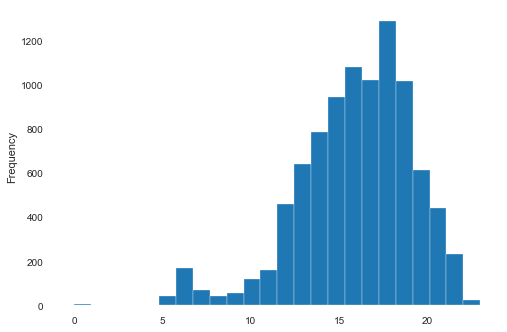

In [336]:
avghour['AvgTimeOfDay'].plot.hist(bins=24)

In [338]:
avghour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9217 entries, 0 to 9216
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unique_member_identifier  9217 non-null   object 
 1   AvgTimeOfDay              9217 non-null   float64
dtypes: float64(1), object(1)
memory usage: 144.1+ KB


In [342]:
avghour.loc[(avghour['AvgTimeOfDay'] <4) & (avghour['AvgTimeOfDay'] >=0),'AvgTimeOfDay'] = 24
avghour.loc[(avghour['AvgTimeOfDay'] >=4) & (avghour['AvgTimeOfDay'] <=10),'AvgTimeOfDay'] = 10

Dealing with outliers for AvgTimeOfDay

<AxesSubplot:ylabel='Frequency'>

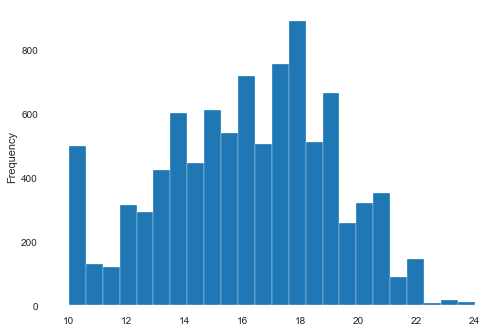

In [344]:
avghour['AvgTimeOfDay'].plot.hist(bins=24)

## User Reachable Via SMS or Email
Files Created by Diana Nwokedi

In [345]:
emailorsms = pd.read_csv("IsQuality.csv")
emailorsms.rename(columns={'> 85% Avg': 'UserReachableViaSMSEmail'}, inplace=True)

## Calculating Birthdate and Urban/Suburban

We assume the date is the last date

In [346]:
last_trans_date

Timestamp('2017-12-13 00:00:00')

In [347]:
SP_Customer['Age'] = ((last_trans_date-SP_Customer['Birthdate'])/np.timedelta64(1, 'Y')).astype(int)

We use the FSN to determine if it's Urban or Rural
https://www.ic.gc.ca/eic/site/bsf-osb.nsf/eng/br03396.html

In [348]:
SP_Customer['Urban'] = SP_Customer['FSA'].apply(lambda x: 0 if x[1]=="0" else 1)

In [349]:
SP_Customer['Urban'].value_counts()

1    16231
0     1769
Name: Urban, dtype: int64

# Carrot and Timeplay Features

In [350]:
SP_Points[SP_Points['PartnerName']== 'Carrot Rewards']['ex_transactiondescription'].value_counts()

step_goal_complete    42205
intervention          17917
sign_up                 873
steps_enabled           731
action_bonus            664
intervention_bonus      473
raf                     425
Name: ex_transactiondescription, dtype: int64

In [351]:
carrot_timeplay = SP_Points[SP_Points['ex_transactiondescription'].isin(['timeplay','step_goal_complete','intervention'])]

In [352]:
carrot_timeplay = pd.pivot_table(carrot_timeplay, values='points', index=['Unique_member_identifier'],
                    columns=['ex_transactiondescription'], aggfunc=np.sum, fill_value=0).reset_index()

In [353]:
carrot_timeplay.rename(columns={'intervention': 'TtlCarrotInterventionPoints', 'step_goal_complete': 'TtlStepPointsCarrot', 'timeplay': 'TtlTimeplay'}, inplace=True)

In [354]:
carrot_total = SP_Points[SP_Points['PartnerName']== 'Carrot Rewards'][['Unique_member_identifier','points']].groupby('Unique_member_identifier').sum().reset_index()

In [355]:
emailorsms.rename(columns={'> 85% Avg': 'UserReachableViaSMSEmail'}, inplace=True)

# Building Customer Base Table

In [356]:
customer_df = SP_Customer[['Unique_member_identifier','gender','Age','Urban','FSA','City','LanguagePreference','TuesdayAttendee_tendancy','TuesdayAttendee_value','AttendsWithChild_tendancy','AttendsWithChild_value','OnlineTicketPurchaser_tendancy','OnlineTicketPurchaser_value','OpensEmail_tendancy','OpensEmail_value','ClicksEmail_tendancy','ConcessionPurchaser_value']]

In [357]:
customer_df = customer_df.merge(cust_spend, on="Unique_member_identifier", how="left", validate="1:1")
customer_df = customer_df.merge(avg_time, on="Unique_member_identifier", how="left", validate="1:1")
customer_df = customer_df.merge(avghour, on="Unique_member_identifier", how="left", validate="1:1")
customer_df = customer_df.merge(timeofday, on="Unique_member_identifier", how="left", validate="1:1")
customer_df = customer_df.merge(carrot_timeplay, on="Unique_member_identifier", how="left", validate="1:1")
customer_df = customer_df.merge(carrot_total, on="Unique_member_identifier", how="left", validate="1:1")
customer_df = customer_df.merge(emailorsms, on="Unique_member_identifier", how="left", validate="1:1")
customer_df = customer_df.merge(last_trans_vs_earliest_date, on="Unique_member_identifier", how="left", validate="1:1")


In [358]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18000 entries, 0 to 17999
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique_member_identifier        18000 non-null  object 
 1   gender                          18000 non-null  object 
 2   Age                             18000 non-null  int32  
 3   Urban                           18000 non-null  int64  
 4   FSA                             18000 non-null  object 
 5   City                            17996 non-null  object 
 6   LanguagePreference              18000 non-null  object 
 7   TuesdayAttendee_tendancy        18000 non-null  bool   
 8   TuesdayAttendee_value           18000 non-null  int64  
 9   AttendsWithChild_tendancy       18000 non-null  bool   
 10  AttendsWithChild_value          18000 non-null  int64  
 11  OnlineTicketPurchaser_tendancy  18000 non-null  bool   
 12  OnlineTicketPurchaser_value     

In [359]:
customer_df['TimeplayPlayer'] = customer_df['TtlTimeplay'].apply(lambda x: 1 if x>0 else 0)
customer_df['CarrotRewardsUser'] = customer_df['points'].apply(lambda x: 1 if x>0 else 0)
customer_df.drop(['TtlTimeplay', 'points'], axis=1, inplace=True)

In [360]:
customer_df['AvgDaysBetweenMovies'] = customer_df.apply(lambda x: x['longesttime'] if pd.isnull(x['AvgDaysBetweenMovies']) else x['AvgDaysBetweenMovies'], axis=1)
customer_df.drop(['longesttime'], axis=1, inplace=True)

Questions for Steve:
* Can we cluster only the users who went to movies?
* When is it appropriate to use one hot encoding vs hamming

In [361]:
movie_customers = customer_df.dropna(subset=['TtlNetPoints'])

In [362]:
movie_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 1 to 17997
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique_member_identifier        9217 non-null   object 
 1   gender                          9217 non-null   object 
 2   Age                             9217 non-null   int32  
 3   Urban                           9217 non-null   int64  
 4   FSA                             9217 non-null   object 
 5   City                            9214 non-null   object 
 6   LanguagePreference              9217 non-null   object 
 7   TuesdayAttendee_tendancy        9217 non-null   bool   
 8   TuesdayAttendee_value           9217 non-null   int64  
 9   AttendsWithChild_tendancy       9217 non-null   bool   
 10  AttendsWithChild_value          9217 non-null   int64  
 11  OnlineTicketPurchaser_tendancy  9217 non-null   bool   
 12  OnlineTicketPurchaser_value     9

In [363]:
movie_customers["TuesdayAttendee_tendancy"] = movie_customers["TuesdayAttendee_tendancy"].astype(int)
movie_customers["AttendsWithChild_tendancy"] = movie_customers["AttendsWithChild_tendancy"].astype(int)
movie_customers["OnlineTicketPurchaser_tendancy"] = movie_customers["OnlineTicketPurchaser_tendancy"].astype(int)
movie_customers["OpensEmail_tendancy"] = movie_customers["OpensEmail_tendancy"].astype(int)
movie_customers["ClicksEmail_tendancy"] = movie_customers["ClicksEmail_tendancy"].astype(int)

In [364]:
movie_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 1 to 17997
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique_member_identifier        9217 non-null   object 
 1   gender                          9217 non-null   object 
 2   Age                             9217 non-null   int32  
 3   Urban                           9217 non-null   int64  
 4   FSA                             9217 non-null   object 
 5   City                            9214 non-null   object 
 6   LanguagePreference              9217 non-null   object 
 7   TuesdayAttendee_tendancy        9217 non-null   int32  
 8   TuesdayAttendee_value           9217 non-null   int64  
 9   AttendsWithChild_tendancy       9217 non-null   int32  
 10  AttendsWithChild_value          9217 non-null   int64  
 11  OnlineTicketPurchaser_tendancy  9217 non-null   int32  
 12  OnlineTicketPurchaser_value     9

In [366]:
movie_customers.to_csv("customers.csv", index_label=False)